In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_agg_all = pd.read_csv('../data/df_agg_all.csv')
df_agg_all = df_agg_all[df_agg_all['r2'] > 0.6].reset_index(drop=True)

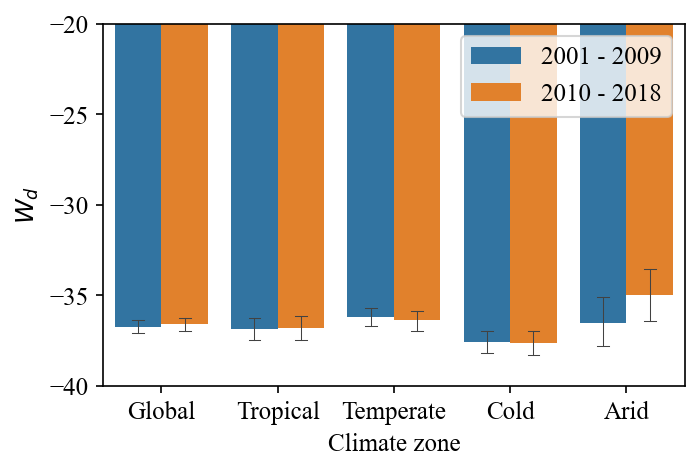

In [5]:
show_dpi = 150
pnt_size = 13
font_size = 12
plt.rc('font', family='Times New Roman', size=font_size)
plt.figure(figsize=(5, 3.2), dpi=show_dpi)

df_agg_all_2 = df_agg_all.copy()
df_agg_all_2['cz_name_0'] = 'Global'
df_agg_all_tmp = pd.concat([df_agg_all_2, df_agg_all], axis=0).reset_index(drop=True)
df_agg_all_tmp['wd_mean'] = 100 * df_agg_all_tmp['wd_mean']

sns.barplot(x='cz_name_0', y='wd_mean', hue='year_2stage', data=df_agg_all_tmp,
           order=['Global', 'Tropical', 'Temperate', 'Cold', 'Arid'],
           ci=95, errwidth=0.5, capsize=0.1)
plt.ylim(-40, -20)
plt.yticks([-20, -25, -30, -35, -40])
plt.ylabel('$W_d$')
plt.xlabel('Climate zone')
plt.legend(frameon=True)
plt.show()

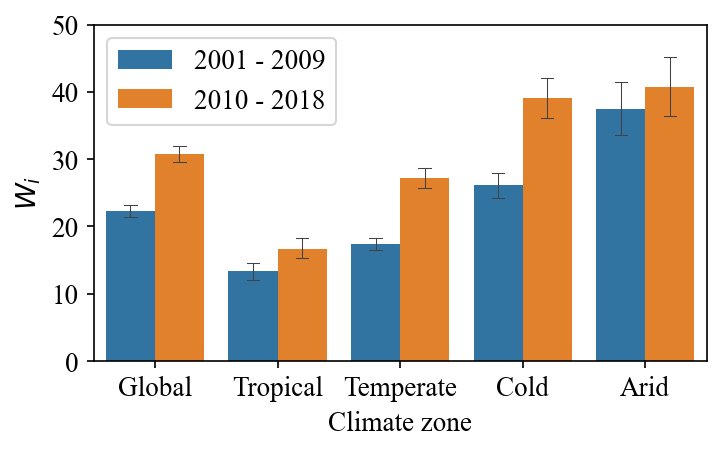

In [6]:
show_dpi = 150
pnt_size = 13
font_size = 13
plt.rc('font', family='Times New Roman', size=font_size)
plt.figure(figsize=(5, 3.2), dpi=show_dpi)

df_agg_all_ = df_agg_all.copy()
df_agg_all_2 = df_agg_all_.copy()
df_agg_all_2['cz_name_0'] = 'Global'
df_agg_all_tmp = pd.concat([df_agg_all_2, df_agg_all_], axis=0).reset_index(drop=True)

sns.barplot(x='cz_name_0', y='wi_mean', hue='year_2stage', data=df_agg_all_tmp,
           order=['Global', 'Tropical', 'Temperate', 'Cold', 'Arid'],
           ci=95, errwidth=0.5, capsize=0.1)
plt.ylim(0, 50)
plt.xlabel('')
plt.ylabel('$W_i$')
plt.xlabel('Climate zone')
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

In [7]:
print(df_agg_all.agg({'wi_mean': np.mean}).round(1))
print(df_agg_all.groupby('year_2stage').agg({'wi_mean': np.mean}).round(1))
print(df_agg_all.groupby('cz_name_0').agg({'wi_mean': np.mean}).round(1))
print(df_agg_all.groupby(['cz_name_0', 'year_2stage']).agg({'wi_mean': np.mean}).round(1))

wi_mean    26.4
dtype: float64
             wi_mean
year_2stage         
2001 - 2009     22.2
2010 - 2018     30.7
           wi_mean
cz_name_0         
Arid          38.9
Cold          32.4
Temperate     22.2
Tropical      15.0
                       wi_mean
cz_name_0 year_2stage         
Arid      2001 - 2009     37.4
          2010 - 2018     40.7
Cold      2001 - 2009     26.1
          2010 - 2018     39.0
Temperate 2001 - 2009     17.4
          2010 - 2018     27.2
Tropical  2001 - 2009     13.3
          2010 - 2018     16.7


# Generate VI~UI relationship in each climate zone

In [8]:
df_all = pd.read_csv('../data/df_all.csv')
print(df_all.shape)

(11937553, 16)


## VI~UI relationships across globe and different climate zones in two time stage

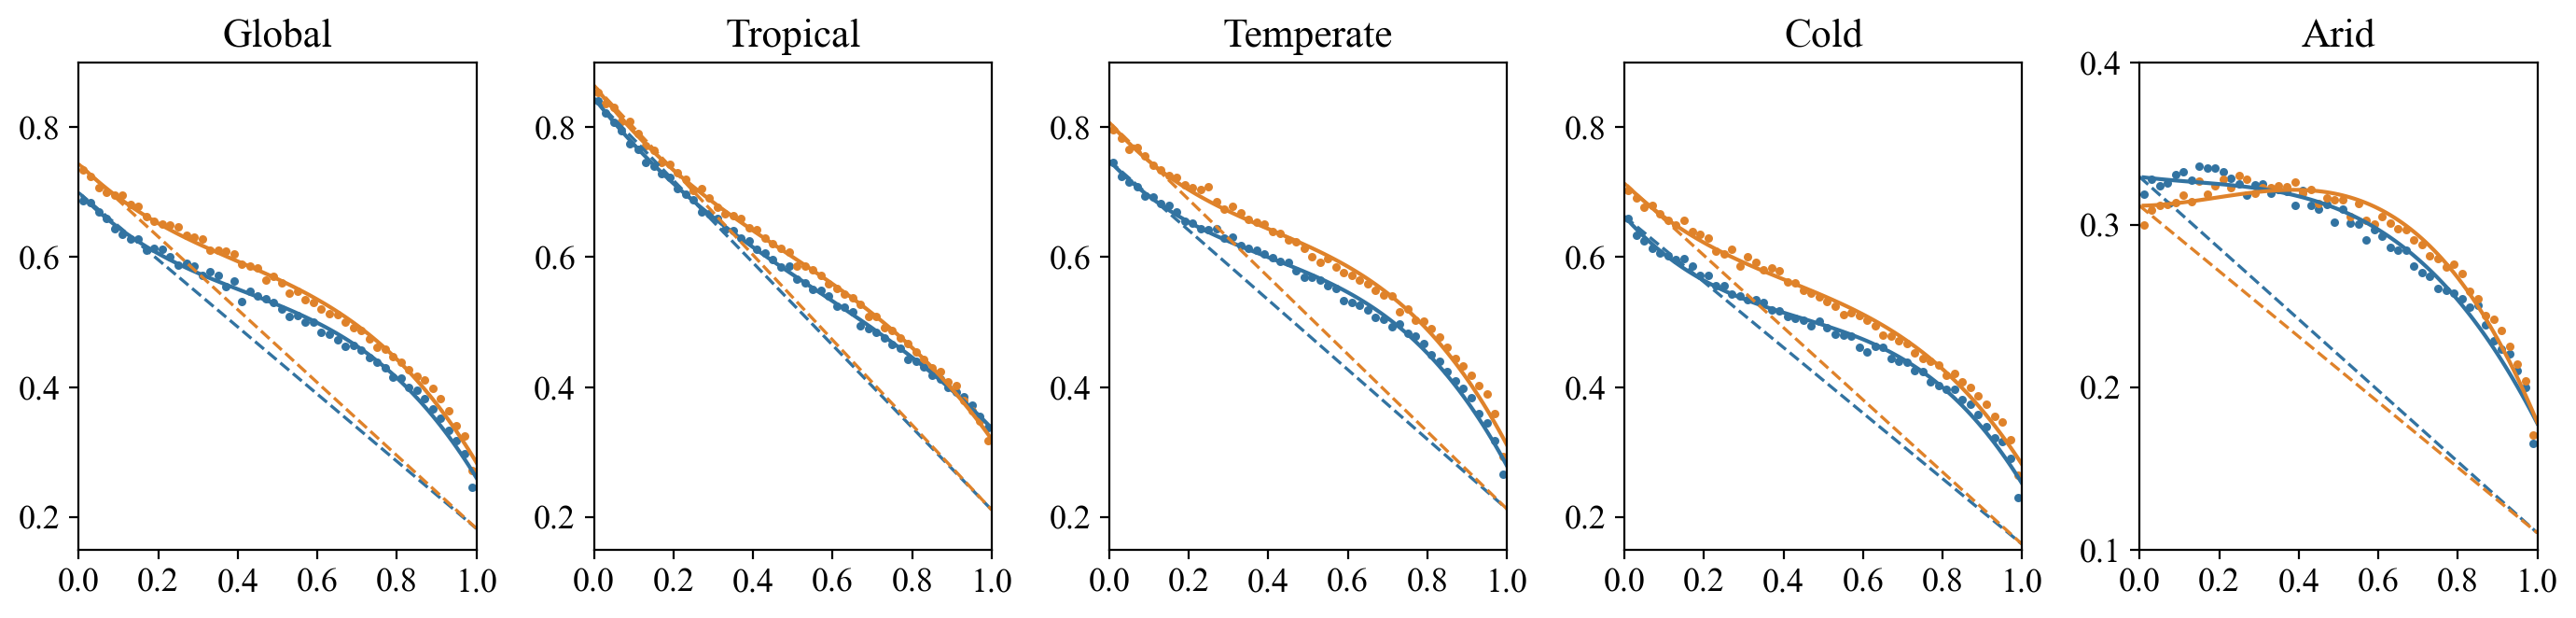

In [9]:
font_size = 13
plt.rc('font', family='Times New Roman', size=font_size)
plt.figure(figsize=(14, 3.5), dpi=200)
color_dict = {1: '#3273A1', 2: '#DF822A'}
y_name = 'EVI'
year_stage_dict = {1: [2002, 2005, 2008], 2: [2011, 2014, 2017]}
year_stage_name_dict = {1: '2001 - 2009', 2: '2010 - 2018'}
rand_cnt = 100000
np.random.seed(314)
plt_id = 0
for cz_name in ['Global', 'Tropical', 'Temperate', 'Cold', 'Arid']:
    plt_id += 1
    plt.subplot(1, 5, plt_id)
    for year_stage in list(year_stage_dict.keys()):
        if cz_name == 'Global':
            df_all_cz = df_all.copy()
        else:
            df_all_cz = df_all[df_all['cz_name_0'] == cz_name].reset_index(drop=True)
        df_all_cz = df_all_cz[df_all_cz['city_id'].isin(list(df_agg_all[df_agg_all['r2'] > 0.6]['city']))].reset_index(drop=True)
        df_all_cz_year = df_all_cz[df_all_cz['year'].isin(year_stage_dict[year_stage])].reset_index(drop=True)

        rand_idx_list = np.random.choice(len(df_all_cz_year), rand_cnt, replace=False)
        df_all_cz_year = df_all_cz_year.iloc[rand_idx_list].reset_index(drop=True)

        sns.regplot(x='UI', y=y_name, data=df_all_cz_year, scatter_kws={'s': 5, 'color': color_dict[year_stage]}, line_kws={'linewidth': 1.5, 'color': color_dict[year_stage]}, order=3, ci=0, x_bins=np.arange(0.01, 1.0, 0.02), label=year_stage_name_dict[year_stage])

        if cz_name == 'Global':
            Vn = np.mean(df_agg_all['Vn'])
        else:
            Vn = np.mean(df_agg_all[df_agg_all['cz_name_0'] == cz_name]['Vn'])
        reg = np.polyfit(list(df_all_cz_year['UI']), list(df_all_cz_year['EVI']), deg=3)
        Vv_reg = np.polyval(reg, 0)
        Vv = Vv_reg
        plt.plot([0, 1], [Vv, Vn], c=color_dict[year_stage], linewidth=1.2, linestyle='--')
    plt.xlim(0, 1)
    if cz_name in ['Global', 'Tropical', 'Temperate', 'Cold']:
        plt.ylim(0.15, 0.9)
    elif cz_name in ['Arid']:
        plt.ylim(0.1, 0.4)
        plt.yticks([0.1, 0.2, 0.3, 0.4])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}'.format(cz_name))
plt.tight_layout()
plt.show()

## Wi across globe and different climate zones in two time stage

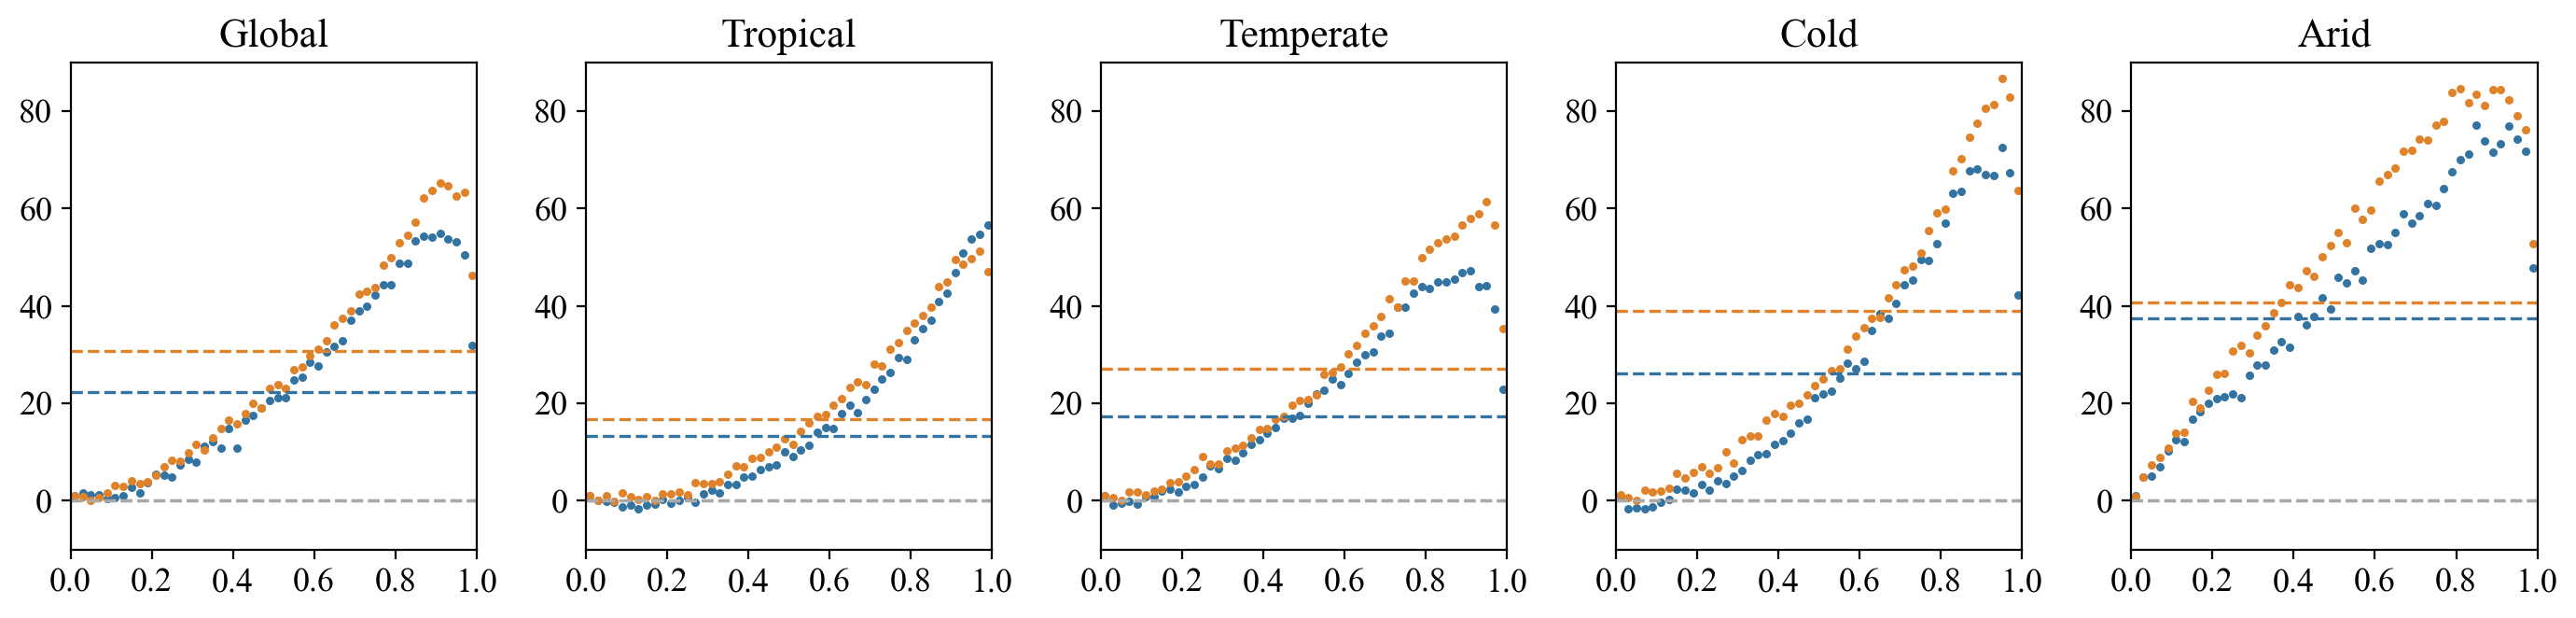

In [10]:
font_size = 13
plt.rc('font', family='Times New Roman', size=font_size)
plt.figure(figsize=(14, 3.5), dpi=200)
color_dict = {1: '#3273A1', 2: '#DF822A'}
y_name = 'EVI'
year_stage_dict = {1: [2002, 2005, 2008], 2: [2011, 2014, 2017]}
year_stage_name_dict = {1: '2001 - 2009', 2: '2010 - 2018'}
rand_cnt = 100000
np.random.seed(314)
plt_id = 0
for cz_name in ['Global', 'Tropical', 'Temperate', 'Cold', 'Arid']:
    plt_id += 1
    plt.subplot(1, 5, plt_id)
    for year_stage in list(year_stage_dict.keys()):
        if cz_name == 'Global':
            df_all_cz = df_all.copy().reset_index(drop=True)
        else:
            df_all_cz = df_all[df_all['cz_name_0'] == cz_name].reset_index(drop=True)
        df_all_cz = df_all_cz[df_all_cz['city_id'].isin(list(df_agg_all[df_agg_all['r2'] > 0.6]['city']))].reset_index(drop=True)
        df_all_cz_year = df_all_cz[df_all_cz['year'].isin(year_stage_dict[year_stage])].reset_index(drop=True)

        rand_idx_list = np.random.choice(len(df_all_cz_year), rand_cnt, replace=False)
        df_all_cz_year = df_all_cz_year.iloc[rand_idx_list].reset_index(drop=True)
        
        Vv = np.mean(df_all_cz_year[df_all_cz_year['UI'] <= 0.02][y_name])
        if cz_name == 'Global':
            Vn = np.mean(df_agg_all['Vn'])
        else:
            Vn = np.mean(df_agg_all[df_agg_all['cz_name_0'] == cz_name]['Vn'])
        df_all_cz_year['Vzi'] = Vv - (Vv - Vn) * df_all_cz_year['UI']
        df_all_cz_year['Wi'] = 100 * (df_all_cz_year[y_name] - df_all_cz_year['Vzi']) / df_all_cz_year['Vzi']
        
        sns.regplot(x='UI', y='Wi', data=df_all_cz_year, scatter_kws={'s': 5, 'color': color_dict[year_stage]}, line_kws={'linewidth': 0, 'color': color_dict[year_stage]}, order=3, ci=0, x_bins=np.arange(0.01, 1.0, 0.02), label=year_stage_name_dict[year_stage])

        if cz_name == 'Global':
            wi_mean = np.mean(df_agg_all[df_agg_all['year'].isin(year_stage_dict[year_stage])]['wi_mean'])
        else:
            wi_mean = np.mean(df_agg_all[(df_agg_all['cz_name_0'] == cz_name) & df_agg_all['year'].isin(year_stage_dict[year_stage])]['wi_mean'])
        plt.plot([0, 1], [wi_mean, wi_mean], c=color_dict[year_stage], linewidth=1.2, linestyle='--')
        plt.plot([0, 1], [0, 0], c='darkgray', linewidth=1.2, linestyle='--')
    plt.xlim(0, 1)
    plt.ylim(-10, 90)
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{}'.format(cz_name))
plt.tight_layout()
plt.show()